In [46]:
from random import random
import matplotlib.pyplot as plt

In [47]:
# Classe Produtos
class Produto():
    # Construtor da classe
    def __init__(self, nome, rating, valor):
        # Definição de atributos
        self.nome = nome
        self.rating = rating
        self.valor = valor

In [48]:
# Classe individuos, uma população é um conjunto de individuos        
class Individuo():
    def __init__(self, ratings, valores, limite_ratings, geracao=0):
        # Definição de atributos
        self.ratings = ratings
        self.valores = valores
        self.limite_ratings = limite_ratings
        self.nota_avaliacao = 0
        self.rating_usado = 0
        self.geracao = geracao
        self.cromossomo = [] # Sequencias de 0 e 1's que representam uma solução
        
        # Preenche os cromossomos de forma aleatória
        for i in range(len(ratings)):
            if random() < 0.5: # 50% de chance para cada valor
                self.cromossomo.append("0")
            else:
                self.cromossomo.append("1")
                
    # Método de avaliação, maneira de avaliar a solução gerada.
    def avaliacao(self):
        nota = 0
        soma_ratings = 0
        # Procura em cada gene do cromossomo os valores que foram selecionados (==1)
        for i in range(len(self.cromossomo)):
           if self.cromossomo[i] == '1':
               nota += self.valores[i]
               soma_ratings += self.ratings[i]
        # Se o resultado da somatório for maior do que o limite que foi indicado, a solução recebe a nota 1 como padrão.
        if soma_ratings > self.limite_ratings:
            nota = 1
        # Carregamos os atributos com a avaliação
        self.nota_avaliacao = nota
        self.rating_usado = soma_ratings
        
    # Método crossover (reprodução) Operador Genético
    def crossover(self, outro_individuo):
        # Define posição do corte para o cruzamento
        corte = round(random()  * len(self.cromossomo))
        
        # Cria primeiro filho usando a posição de corte e o cromosso dos pais
        filho1 = outro_individuo.cromossomo[0:corte] + self.cromossomo[corte::]
        # Cria segundo filho usando a posição de corte e o cromosso dos pais
        filho2 = self.cromossomo[0:corte] + outro_individuo.cromossomo[corte::]
        
        # Criamos uma lista de objetos do tipo Idividuo para receber a nova geração de cromossomos
        filhos = [Individuo(self.ratings, self.valores, self.limite_ratings, self.geracao + 1),
                  Individuo(self.ratings, self.valores, self.limite_ratings, self.geracao + 1)]
        # Inicializo a nova geração com os filhos que foram criados
        filhos[0].cromossomo = filho1
        filhos[1].cromossomo = filho2
        # Retorna lista com individuos
        return filhos
    
    # Método mutação Operador Genético (diversidade)
    def mutacao(self, taxa_mutacao):
        # Percorre todos os genes do cromossomo        
        for i in range(len(self.cromossomo)):
            # Verifica se executa uma mutação (taxa de mutação é passada como parâmetro)
            if random() < taxa_mutacao: # 0.01 1%
                # Subistitui valores, se 0 -> 1 se 1 -> 0
                if self.cromossomo[i] == '1':
                    self.cromossomo[i] = '0'
                else:
                    self.cromossomo[i] = '1'        
        return self

In [49]:
# Criamos a classe principal do projeto
class AlgoritmoGenetico():
    # Criamos o contrutor da classe, que recebe como parâmetro o tamanho da população
    # que será o numero de individuos que queremos criar.
    def __init__(self, tamanho_populacao):
        self.tamanho_populacao = tamanho_populacao
        # Lista para objetos do Individuo
        self.populacao = []
        self.geracao = 0
        self.melhor_solucao = 0
        self.lista_solucoes = []
        
    # Método de criação da População
    def inicializa_populacao(self, ratings, valores, limite_ratings):
        # Inicializo a população
        for i in range(self.tamanho_populacao):
            self.populacao.append(Individuo(ratings, valores, limite_ratings))
        self.melhor_solucao = self.populacao[0]
    
    # Avalia a poplação de acordo com a nota (valor do individuo) (ordena do maior para o menor)
    def ordena_populacao(self):
        self.populacao = sorted(self.populacao,
                                key = lambda populacao: populacao.nota_avaliacao,
                                reverse = True)
    
    # Método para buscar o melhor individuo
    def melhor_individuo(self, individuo):
        if individuo.nota_avaliacao > self.melhor_solucao.nota_avaliacao:
            self.melhor_solucao = individuo
    
    # Método para somar todas as notas de uma população    
    def soma_avaliacoes(self):
        soma = 0
        for individuo in self.populacao:
           soma += individuo.nota_avaliacao
        return soma
    
    # Método de seleção de pais para geração da proxima geração (roleta viciada)
    # Retorna o indice do array que foi selecionado
    def seleciona_pai(self, soma_avaliacao):
        pai = -1
        # Sorteia um dos valores na roleta
        valor_sorteado = random() * soma_avaliacao
        soma = 0
        i = 0
        while i < len(self.populacao) and soma < valor_sorteado:
            soma += self.populacao[i].nota_avaliacao
            pai += 1
            i += 1
        return pai
    
    # Método para visualização dos cromossomos durante as gerações
    def visualiza_geracao(self):
        # Como o vetor está ordenado, usamos a posição 0
        melhor = self.populacao[0]
        print("G:%s -> Valor: %s rating: %s Cromossomo: %s" % (self.populacao[0].geracao,
                                                               melhor.nota_avaliacao,
                                                               melhor.rating_usado,
                                                               melhor.cromossomo))
    
    # 
    def resolver(self, taxa_mutacao, numero_geracoes, ratings, valores, limite_ratings):
        # Inicializa uma população
        self.inicializa_populacao(ratings, valores, limite_ratings)
        # Avaliação da população
        for individuo in self.populacao:
            individuo.avaliacao()
        # Ordenação da população
        self.ordena_populacao()
        self.melhor_solucao = self.populacao[0]
        # Insere valores na lista para usar no grafico
        self.lista_solucoes.append(self.melhor_solucao.nota_avaliacao)
        
        self.visualiza_geracao()
        # Roda o loop do algoritmo genetico até atender o critério de parada
        # (seleção dos pais, geração dos filhos, crossover, mutação)
        for geracao in range(numero_geracoes):
            # Somatório para seleção dos pais da nova geração
            soma_avaliacao = self.soma_avaliacoes()            
            nova_populacao = []
            # Faz a combinação dos pais (Roleta)
            for individuos_gerados in range(0, self.tamanho_populacao, 2):
                # Seleção dos pais
                pai1 = self.seleciona_pai(soma_avaliacao)
                pai2 = self.seleciona_pai(soma_avaliacao)
                # Criação dos filhos
                filhos = self.populacao[pai1].crossover(self.populacao[pai2])
                # Nova Geração de individuos
                nova_populacao.append(filhos[0].mutacao(taxa_mutacao))
                nova_populacao.append(filhos[1].mutacao(taxa_mutacao))
            # Substituição da população antiga
            self.populacao = list(nova_populacao)
            # Avaliação dos individuos
            for individuo in self.populacao:
                individuo.avaliacao()
            # Ordenação dos melhores
            self.ordena_populacao()
            # Visualização dos individuos
            self.visualiza_geracao()
            # Busca pela melhor solução
            melhor = self.populacao[0]
            # Popula lista do grafico
            self.lista_solucoes.append(melhor.nota_avaliacao)
            self.melhor_individuo(melhor)
        
        # Imprime a melhor solução ao final do processo
        print("\nMelhor solução -> Geração: %s Valor: %s rating: %s Cromossomo: %s" %
              (self.melhor_solucao.geracao,
               self.melhor_solucao.nota_avaliacao,
               self.melhor_solucao.rating_usado,
               self.melhor_solucao.cromossomo))
        
        return self.melhor_solucao.cromossomo

G:0 -> Valor: 1 rating: 1.1225718725718725 Cromossomo: ['0', '1', '1', '0', '1', '0', '1', '1', '0']
G:1 -> Valor: 1 rating: 0.869815668202765 Cromossomo: ['1', '0', '0', '1', '1', '0', '0', '0', '1']
G:2 -> Valor: 1 rating: 1.0970883954754922 Cromossomo: ['1', '0', '0', '1', '0', '0', '1', '1', '1']
G:3 -> Valor: 1 rating: 1.0812153796024764 Cromossomo: ['0', '0', '0', '1', '1', '1', '1', '1', '0']
G:4 -> Valor: 1 rating: 1.0812153796024764 Cromossomo: ['0', '0', '0', '1', '1', '1', '1', '1', '0']
G:5 -> Valor: 1 rating: 1.3193106176977143 Cromossomo: ['1', '0', '0', '1', '1', '1', '0', '1', '1']
G:6 -> Valor: 1 rating: 1.0812153796024764 Cromossomo: ['0', '0', '0', '1', '1', '1', '1', '1', '0']
G:7 -> Valor: 1 rating: 1.3034376018246985 Cromossomo: ['0', '1', '0', '1', '1', '1', '1', '1', '0']
G:8 -> Valor: 1 rating: 0.8959235209235209 Cromossomo: ['1', '1', '0', '0', '0', '0', '1', '1', '0']
G:9 -> Valor: 1 rating: 1.3034376018246985 Cromossomo: ['0', '1', '0', '1', '1', '1', '1', '

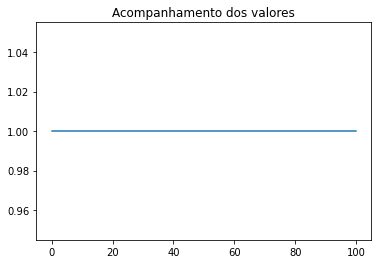

In [50]:
# Função main do projeto
if __name__ == '__main__':
        # Teste para inicializar um produto
        #p1 = Produto("Iphone 6", 0.0000899, 2199.12)

    # Cria uma lista para receber os produtos
    lista_produtos = []
    # Insere produtos em uma lista de objetos do tipo Produto.
    lista_produtos.append(Produto("Casio PX-770 BK", 1/4.2, 749.00))
    lista_produtos.append(Produto("Alesis Recital | 88 Key ", 1/4.5, 219.99))
    lista_produtos.append(Produto("RockJam 88-Key", 1/3.9, 536.99))
    lista_produtos.append(Produto("Alesis Recital Pro | Digital Piano", 1/4.65, 349.00))
    lista_produtos.append(Produto("Yamaha YDP144R Arius", 1/4.8, 860.15))
    lista_produtos.append(Produto("Yamaha P121 73-key Weighted ", 1/4.5, 600.00))
    lista_produtos.append(Produto("Yamaha P71 Digital Piano", 1/4.8, 523.99))
    lista_produtos.append(Produto("Yamaha P45, 88-Key ", 1/4.4, 474.99))
    lista_produtos.append(Produto("Korg 88 Key Lifestyle Piano Black ", 1/4.8, 649.98))    
    
    # Criamos uma lista para armazenar as informações do produtos
    ratings = []
    valores = []
    nomes = []
    # Inicializamos as listas
    for produto in lista_produtos:
        ratings.append(produto.rating)
        valores.append(produto.valor)
        nomes.append(produto.nome)
    #### PARAMETRO DE BUSCA DO ALGORITMO ####
    # Neste caso 3 metros cubicos.
    limite = 1/5
    
    #### AJUSTE DE PARAMETROS DO ALGORITMO ####
    # Criamos 20 Individuos
    tamanho_populacao = 20
    # Taxa de mutação em 1%
    taxa_mutacao = 0.01
    # Total de tentativas para encontrar a resposta
    numero_geracoes = 100
    #### AJUSTE DE PARAMETROS DO ALGORITMO ####

    # Cria um objeto da classe AlgoritmoGenetico
    ag = AlgoritmoGenetico(tamanho_populacao)
    # Chama o método resolver onde passamos os parametros do algoritmo
    # Resolver terá o cromossomo com a melhor solução encontrada
    resultado = ag.resolver(taxa_mutacao, numero_geracoes, ratings, valores, limite)
    # Para visualizar os itens que foram selecionados
    for i in range(len(lista_produtos)):
        if resultado[i] == '1':
            print("Nome: %s R$ %s " % (lista_produtos[i].nome,
                                       lista_produtos[i].valor))
            
    # Mostra os valores em um grafico durante as gerações
    plt.plot(ag.lista_solucoes)
    plt.title("Acompanhamento dos valores")
    plt.show()